In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "insurance-prediction"

**Understanding dataset**

In [2]:
ins <- read.csv("/kaggle/input/insurance-prediction/insurance.csv")
head(ins)

,age,sex,bmi,children,smoker,region,charges
,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,19,0,27.900,0,1,3,16884.924
2,18,1,33.770,1,0,2,1725.552
3,28,1,33.000,3,0,2,4449.462
4,33,1,22.705,0,0,1,21984.471
5,32,1,28.880,0,0,1,3866.855
6,31,0,25.740,0,0,2,3756.622


In [3]:
str(ins)

'data.frame':	348 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : int  0 1 1 1 1 0 0 0 1 0 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : int  1 0 0 0 0 0 0 0 0 0 ...
 $ region  : int  3 2 2 1 1 2 2 1 0 1 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [4]:
unique(ins$sex)
unique(ins$children)
unique(ins$smoker)
unique(ins$region)

[1] 0 1

[1] 0 1 3 2 5 4

[1] 1 0

[1] 3 2 1 0

In [5]:
ins$sex <- factor(ins$sex)
ins$children <- factor(ins$children)
ins$smoker <- factor(ins$smoker)
ins$region <- factor(ins$region)

In [6]:
str(ins)

'data.frame':	348 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "0","1": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: Factor w/ 6 levels "0","1","2","3",..: 1 2 4 1 1 1 2 4 3 1 ...
 $ smoker  : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "0","1","2","3": 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [7]:
summary(ins)

      age        sex          bmi        children smoker  region
 Min.   :18.00   0:171   Min.   :15.96   0:150    0:267   0:86  
 1st Qu.:27.00   1:177   1st Qu.:26.78   1: 82    1: 81   1:85  
 Median :40.00           Median :30.30   2: 63            2:95  
 Mean   :39.59           Mean   :30.68   3: 43            3:82  
 3rd Qu.:53.00           3rd Qu.:34.78   4:  7                  
 Max.   :64.00           Max.   :49.06   5:  3                  
    charges     
 Min.   : 1137  
 1st Qu.: 4888  
 Median : 9719  
 Mean   :14016  
 3rd Qu.:19006  
 Max.   :51195  

**Univariate Analysis**

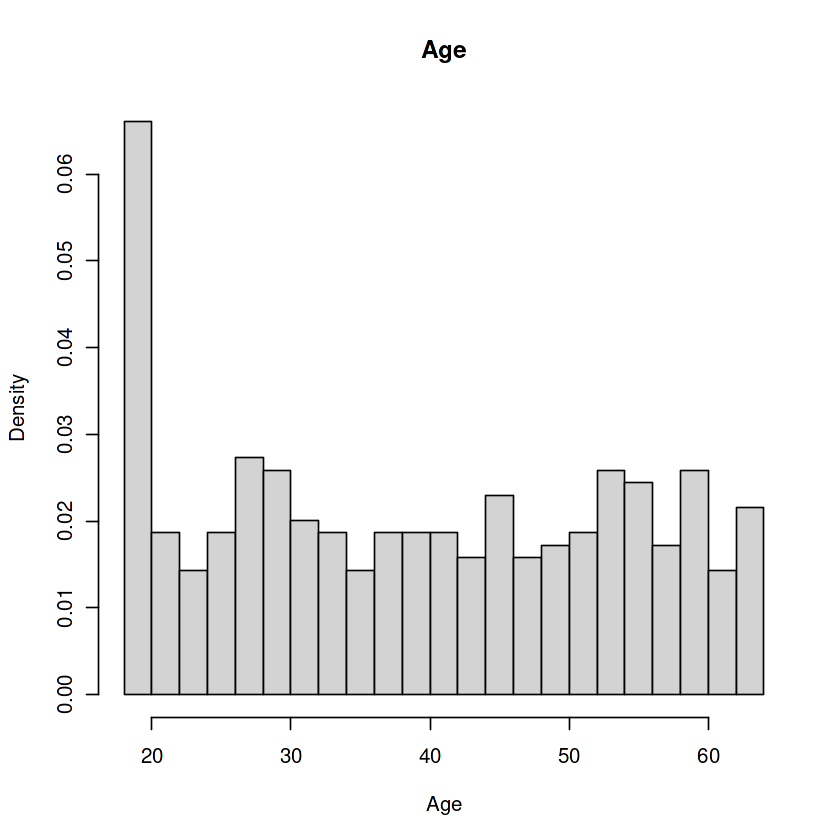

In [8]:
hist(ins$age, breaks = 20, main = 'Age', xlab= 'Age', freq = FALSE)

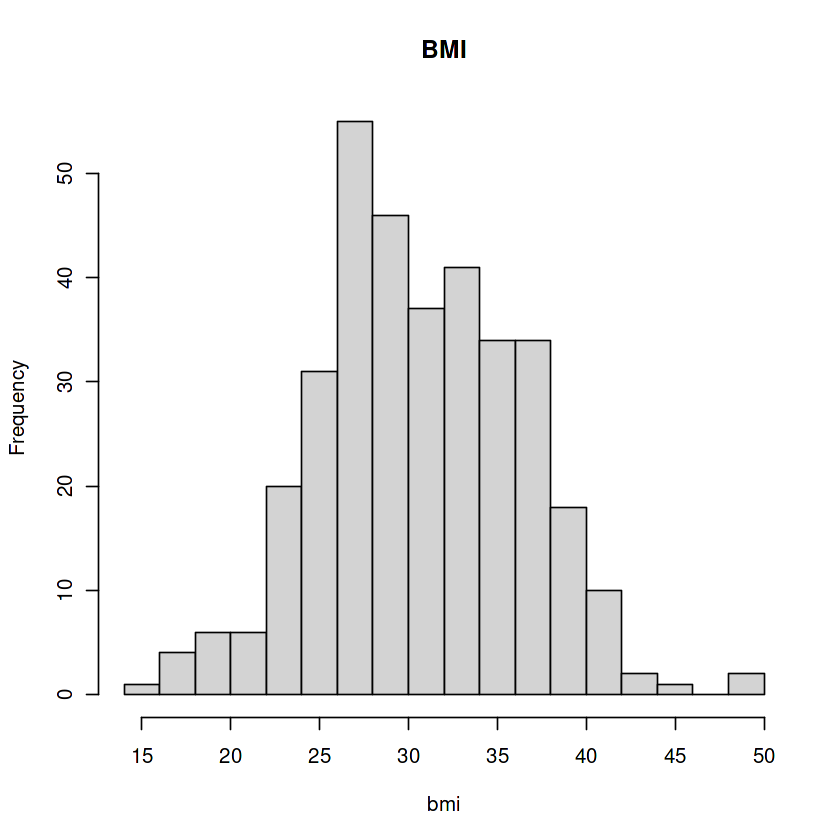

In [9]:
hist(ins$bmi, breaks = 20, main = 'BMI', xlab= 'bmi')

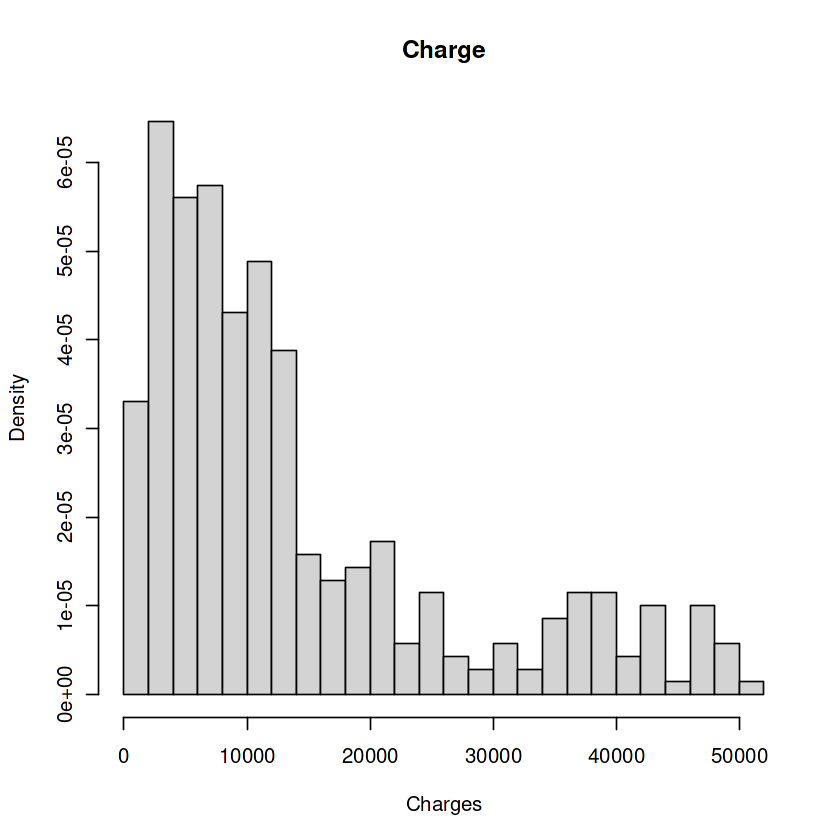

In [10]:
hist(ins$charges, breaks = 20, main ='Charge', xlab= 'Charges', freq = FALSE)

Distribution of charges is right skewed. So, we're applying log transformation to get normal data. 

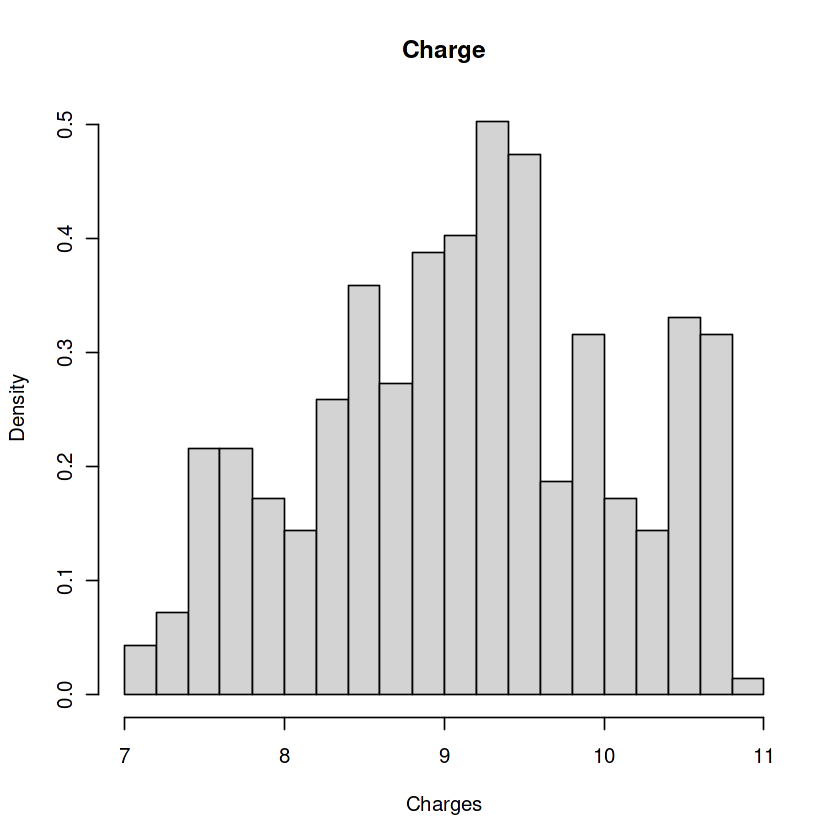

In [11]:
hist(log(ins$charges), breaks = 20, main ='Charge', xlab= 'Charges', freq = FALSE)

**Bivariate Analysis**

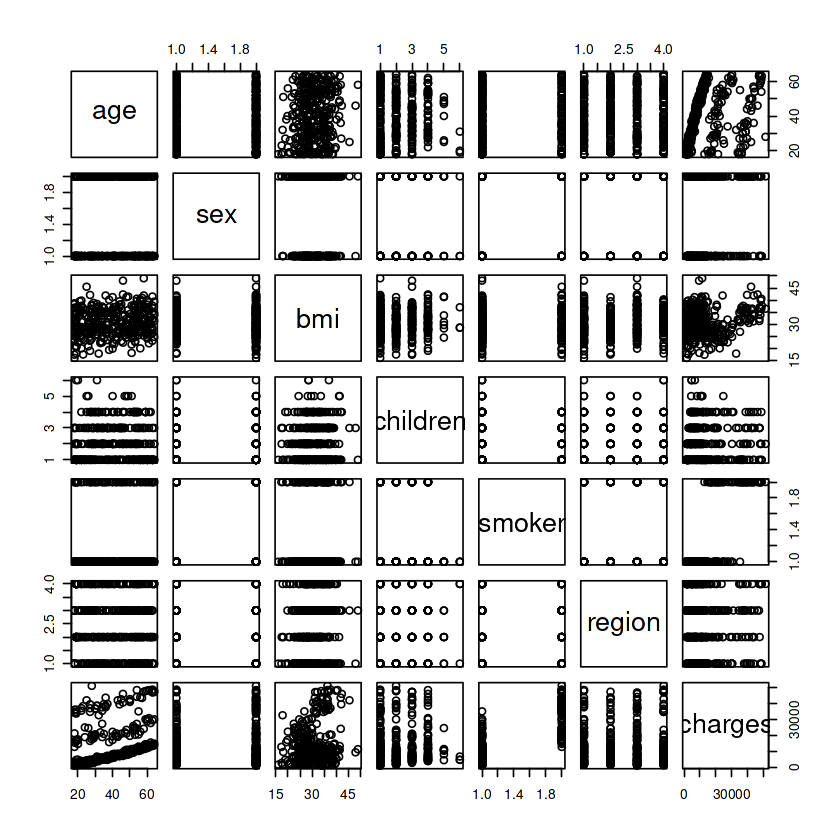

In [12]:
plot(ins)

In [13]:
library(tidyverse)
pl <- ins %>% select(c(age, bmi, charges))

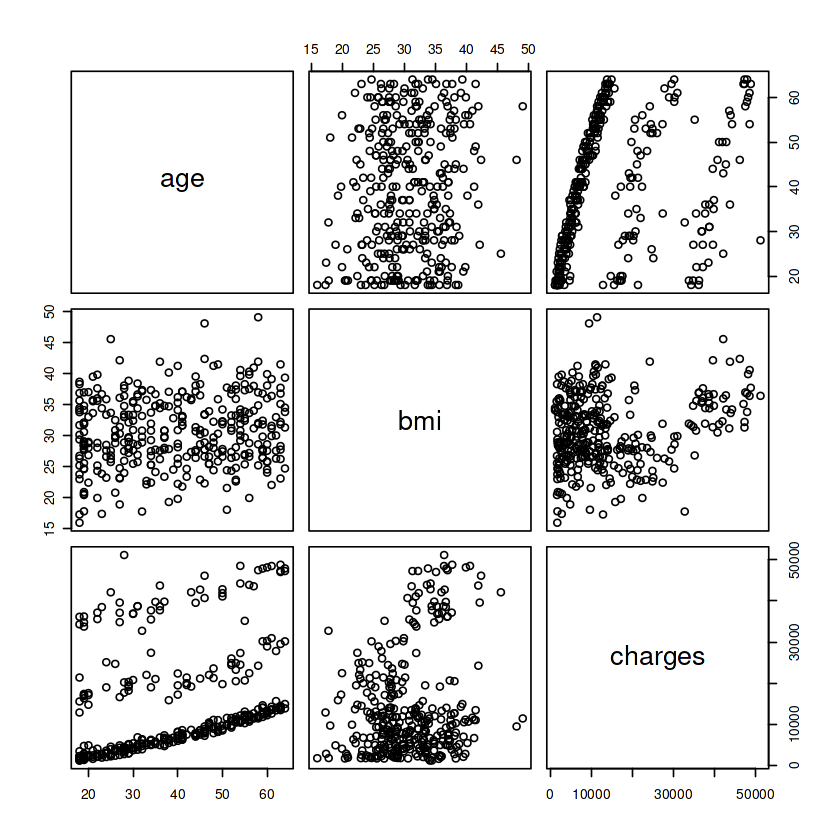

In [14]:
plot(pl)

**Checking for highly correlated variables**

In [15]:
cor(pl)  # There's no multicollinearity here

,age,bmi,charges
age,1.0000000,0.1324399,0.3173780
bmi,0.1324399,1.0000000,0.2100506
charges,0.3173780,0.2100506,1.0000000


**Outliers treatment**

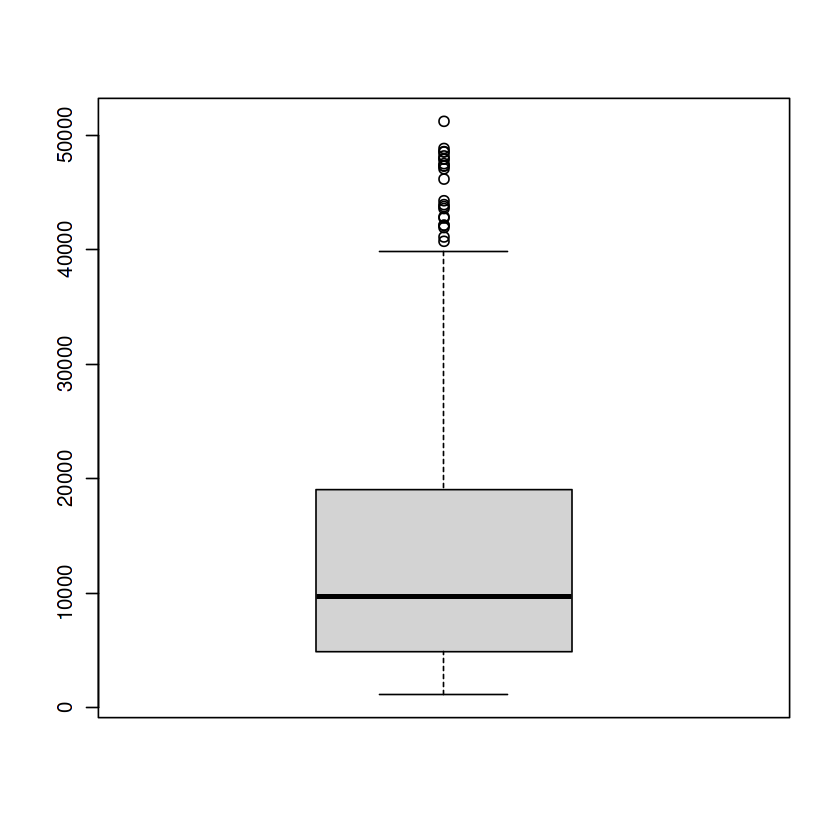

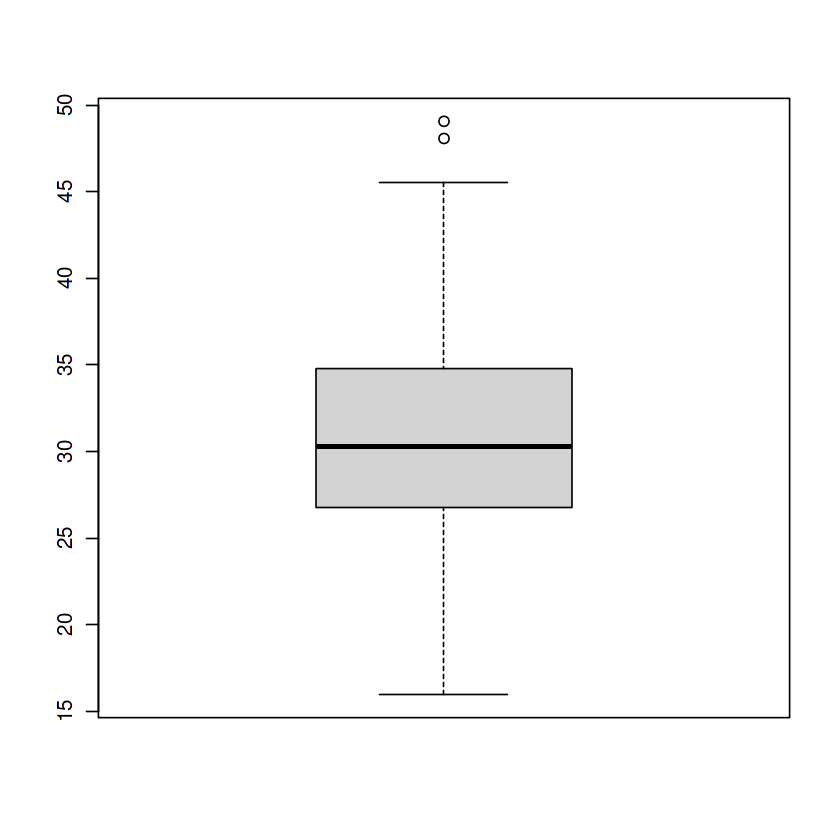

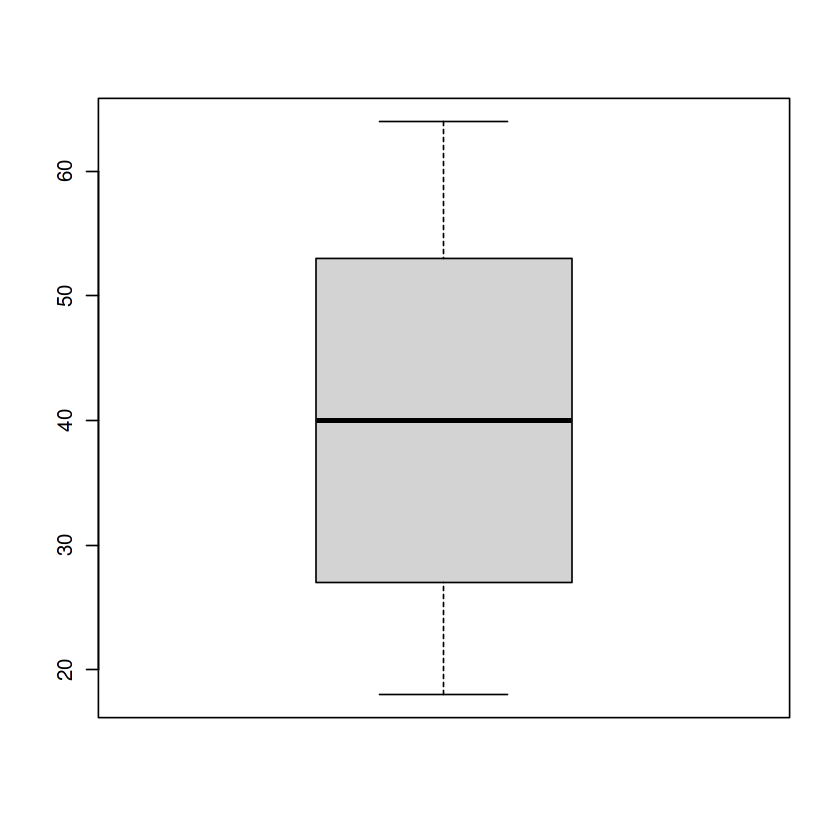

In [16]:
boxplot(ins$charges)
boxplot(ins$bmi)
boxplot(ins$age)

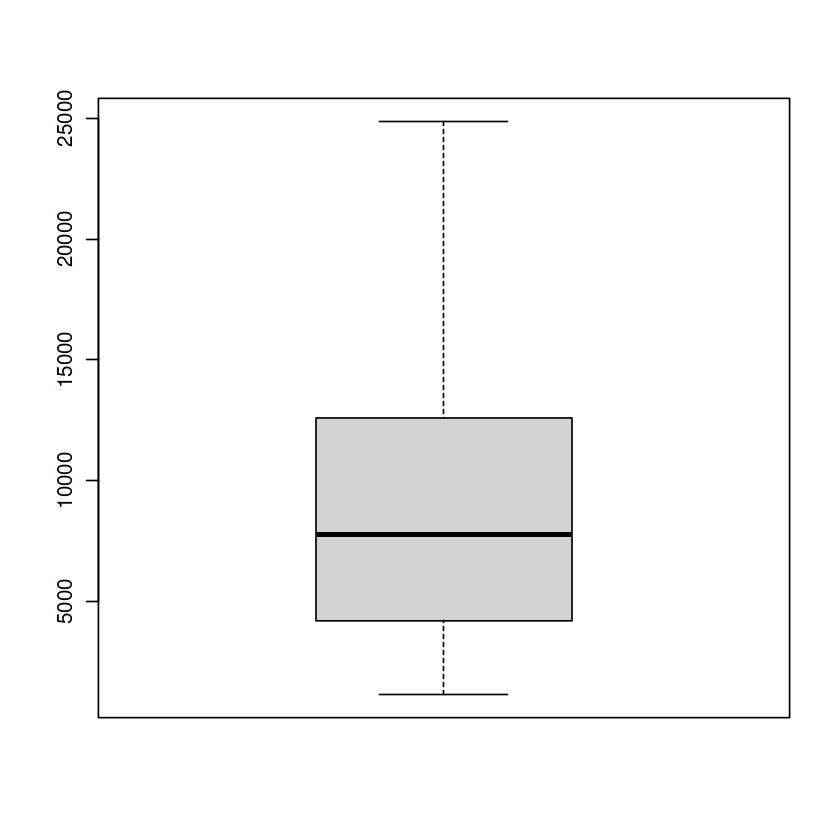

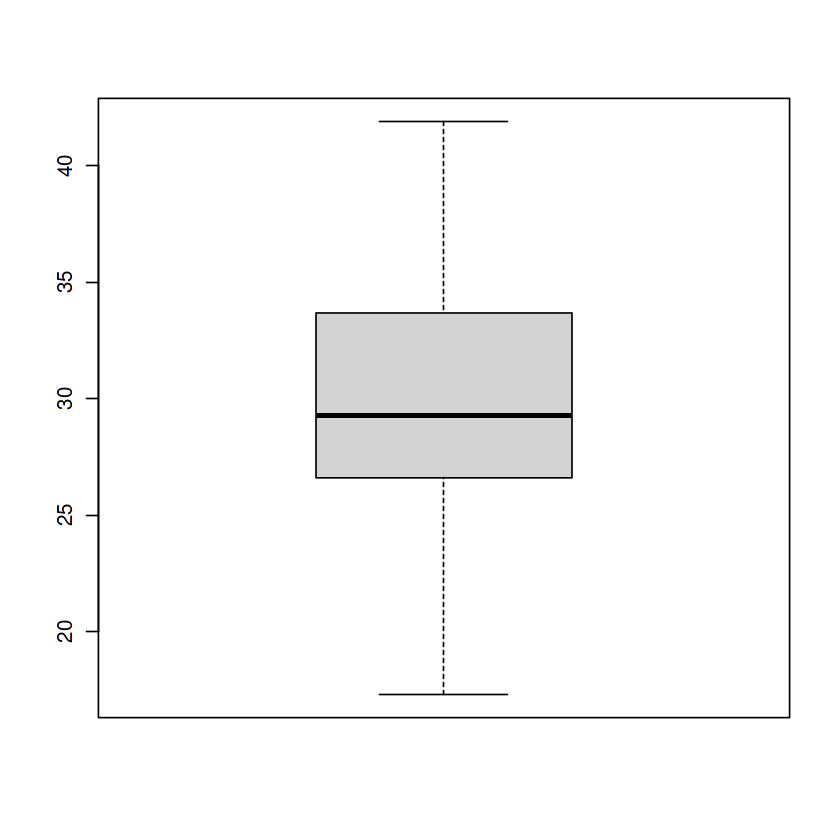

In [17]:
ins1 <- ins %>% filter(charges<25000)
ins1 <- ins1 %>% filter(bmi<45 & bmi>16)
boxplot(ins1$charges)
boxplot(ins1$bmi)

**Base Model Building**

In [18]:
partition <- sample(2, nrow(ins1), replace = TRUE, prob = c(0.80, 0.20))
train <- ins[partition==1,]
test <- ins[partition==2,]

In [19]:
model <- lm(charges ~ ., data = train)
summary(model)


Call:
lm(formula = charges ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12660.6  -2737.7   -930.2   1574.4  24979.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11889.46    2321.97  -5.120 5.73e-07 ***
age            252.07      24.90  10.122  < 2e-16 ***
sex1            87.57     721.19   0.121   0.9034    
bmi            335.29      64.46   5.202 3.85e-07 ***
children1      218.70     930.13   0.235   0.8143    
children2      965.28     975.97   0.989   0.3235    
children3     1844.21    1190.17   1.550   0.1224    
children4     2875.06    2362.60   1.217   0.2247    
children5      864.59    3582.79   0.241   0.8095    
smoker1      24178.78     863.96  27.986  < 2e-16 ***
region1       -444.98    1011.81  -0.440   0.6604    
region2      -1839.85     983.40  -1.871   0.0624 .  
region3         54.70    1043.96   0.052   0.9583    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual s

Ho: All betas are equal to zero

Ha: Atleast one of the betas not equal to 0

Here, we're accepting alternate hypothesis. 

74.38% of the variability in charges is explained by my model

In [20]:
fitted(model) # to get predicted values 

1          2          3          5          6          7          8 
26487.8871  2436.9073  6324.9409  5502.4859  2715.1722  9296.6372  8137.2496 
         9         10         11         12         14         16         17 
 8491.6128 11453.5830  3291.1112 34892.5082 13737.7735  1508.9236 11757.0347 
        18         20         21         23         24         25         27 
 1990.6614 31829.3543 15306.7736  2328.8523 31780.7928  7441.4372 11731.0493 
        28         29         30         31         32         33         34 
13483.7411  -401.5836 33381.9891 29913.3862  1470.9115  3408.4051 13125.5213 
        35         36         37         39         42         43         44 
31912.7337  -609.2831 16190.8679 33713.0510  7331.7446  4214.3888  6889.4266 
        45         46         47         48         49         50         51 
10417.8917 14622.8888  6577.0057  6381.4934  9619.4839 31632.3959  4592.4510 
        52         53         54         55         57         58         59 
 5200.0551 34137.6942 31155.5231  9211.9821 14366.4039 26661.5069 31699.2493 
        60         62         63         66         67         69         72 
 9719.2020  6820.8682 12385.8981  2644.3988 17616.5348  8487.5652  6432.5789 
        73         74         75         76         77         78         79 
12790.7386 11929.5730  9496.0425 13524.2518  3720.5960  3564.5234  7002.2359 
        80         81         82         83         84         85         86 
 9053.1986  5245.1947 12290.1919 28914.8240 16463.9042 34303.9052 31916.7373 
        87         88         89         90         91         93         94 
36659.8890 11400.9738  8561.6609 10575.4656  4804.7007 39094.8521  9198.8220 
        95         97         98         99        100        101        102 
39936.2667 13948.0879 13056.9259 33181.7770 28481.2871  9095.2046  4296.6384 
       103        104        105        106        108        110        111 
 2745.0092 37701.7503  6174.7350 26588.4592  5624.2477 38182.6863 12859.3343 
       112        113        114        115        116        117        118 
12952.4032  7906.2627  4935.5323 13947.9005 12909.8497 17427.5481 27346.1465 
       120        121        123        124        125        126        127 
 5793.1009 12748.3446  2421.9395 34197.9383 12728.3520  4315.6299 26622.0026 
       128        129        130        131        132        133        134 
13812.6430 26832.2371 10431.2352 11869.4599 10876.5338 14527.0555  1110.7488 
       135        136        138        140        141        142        143 
 2803.2137  1221.0653  1739.5471  5781.1579  5250.9141  5864.1421 28555.4735 
       144        146        147        148        149        150        151 
 5998.2264  8444.1778 35595.9385 11995.3733 13793.7960  2783.0213  4884.7722 
       152        153        154        155        156        158        159 
 8415.6618 10475.2739 30711.9274  6948.4656 12094.7919 25355.0260 30011.9248 
       160        161        162        165        166        167        168 
10049.4565 31349.9314 27342.1072  7017.6523 12380.5958  6476.9010  8692.4921 
       169        170        171        172        173        174        175 
 3344.1438  3186.8246 16143.0522 10763.4505 -1913.4382  8874.4132  4895.4293 
       176        177        178        180        181        182        183 
40864.7697  7629.8017 11873.6798 11406.0954 11960.7318  3642.7931  2276.8547 
       184        185        186        187        190        191        192 
 7611.5880  8704.5969 37342.5173  3821.6095  6706.9708 12319.5536  6024.2978 
       193        194        195        196        198        199        200 
 1290.3227 10918.8255  2439.4976  2798.9283  8168.3459  6573.0585 17429.8865 
       201        202        203        205        207        208        209 
 3221.0008  9395.0764 10848.3866  7324.9314 10081.9714 31465.4975 14707.7881 
       210        211        212        213        215        217        218 
12323.5379  4577.4195 11062.999

In [21]:
resid(model) # to get errors

1            2            3            5            6            7 
 -9602.96307   -711.35498  -1875.47890  -1635.63075   1041.44941  -1056.04761 
           8            9           10           11           12           14 
  -855.74401  -2085.20209  17469.55390   -569.79037  -7083.78311  -2647.05566 
          16           17           18           20           21           23 
   328.31339   -959.69852    404.51018   5008.11268  -2077.92665  -1191.84127 
          24           25           27           28           29           30 
  5921.08398  -1237.53550   2720.78581  -1215.10890   3176.77571   5329.01093 
          31           32           33           34           35           36 
  5672.18985    727.27836   1279.39192    644.57664  19281.82542   2234.71688 
          37           39           42           43           44           45 
  -578.67451   6061.22530  -2381.98590   2058.08844   -575.66756  -4338.22018 
          46           47           48           49           50           51 
  6007.39473  -3183.64931  -2824.57109   3010.41278   7076.78010  -2381.32020 
          52           53           54           55           57           58 
 -1620.22640 -10569.42222   6587.05257  -1152.30301   -759.03514   7641.66035 
          59           60           62           63           66           67 
 -8454.45908  -3729.67835  -2316.20577  17780.72006   -901.18480  -3381.46275 
          69           72           73           74           75           76 
 -2567.46107    366.87911  -1049.01259     17.05289  -1769.18849  -2167.59085 
          77           78           79           80           81           82 
   226.81709  -2032.05372  -4247.21494  -2482.17421   -803.98159  -4354.90078 
          83           84           85           86           87           88 
  8250.33977  -5430.24246   5532.61377 -10818.18323   6919.05044   -327.79780 
          89           90           91           93           94           95 
  -534.99434    507.11162  -2777.72664  -8909.91538  -3469.81673   7354.78828 
          97           98           99          100          101          102 
 -1842.76792  -2830.64168 -10769.12853 -12660.58809  -2909.07756   -651.54899 
         103          104          105          106          108          110 
 18599.83747  -6759.55854  -1170.88202  -9028.07946  -1746.94341   8872.84575 
         111          112          113          114          115          116 
 -2034.08056  -1071.04517  -3259.50369  -2530.79854  -2459.58358  17350.14591 
         117          118          120          121          123          124 
 -6046.22266  -8238.36692    893.33043  -5008.00762   -164.46425   5358.55615 
         125          126          127          128          129          130 
 -2613.34313   -930.23070  -9540.92263  -4178.10496   5901.94922  -4348.83019 
         131          132          133          134          135          136 
   945.98506   2739.82484  -3363.48751    521.81563   -346.00258    934.61618 
         138          140          141          142          143          144 
   306.13814  -3614.42590  22124.99065  -2373.59304  -9582.97847  12159.64960 
         146          147          148          149          150          151 
 -3305.92107   5124.61259  -2117.76558  -2834.10130   -940.50235    240.44352 
         152          153          154          155          156          158 
  -626.02682  -4140.93032 -10747.18109    128.72377  -5146.09107  -9836.84572 
         159          160          161          162          165          166 
  6938.33193   9699.92684 -10001.22536   8807.37631  -1989.50567  -1973.50996 
         167          168          169          170          171          172 
 -1646.27102  -2563.69467   -624.86404   1641.08036  -2737.66194  -2646.77050 
         173          174          175          176          177          178 
  3608.23461  -3628.36619  -2039.99177   7959.68033  -1173.93906  -1437.58384 
         180          181          182          183          


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




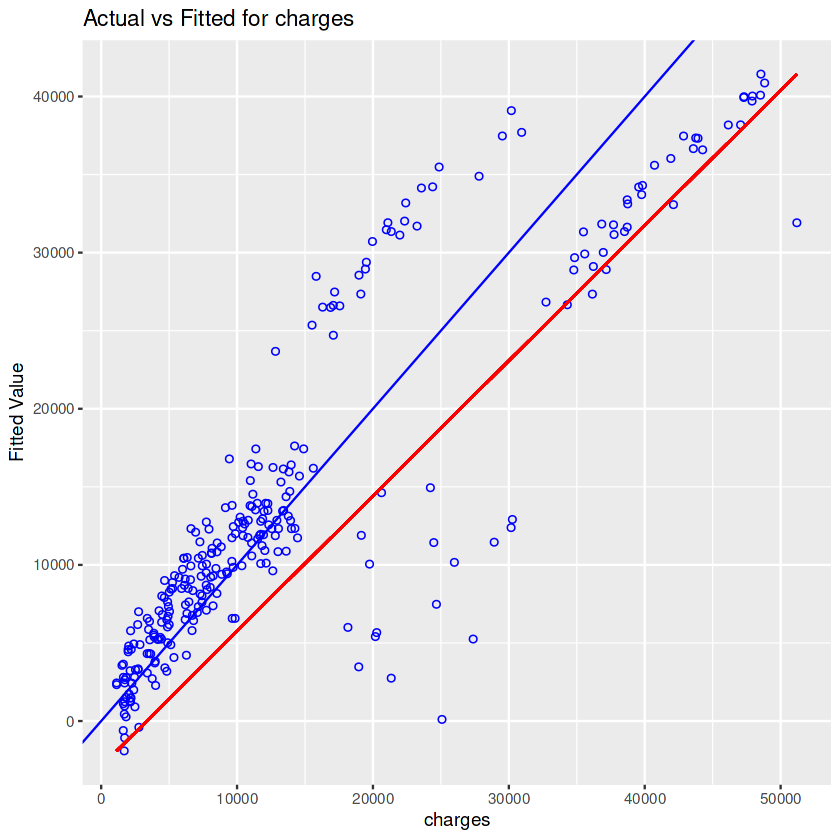

In [22]:
library(olsrr)
ols_plot_obs_fit(model)

**Model Diagnostics Plot**

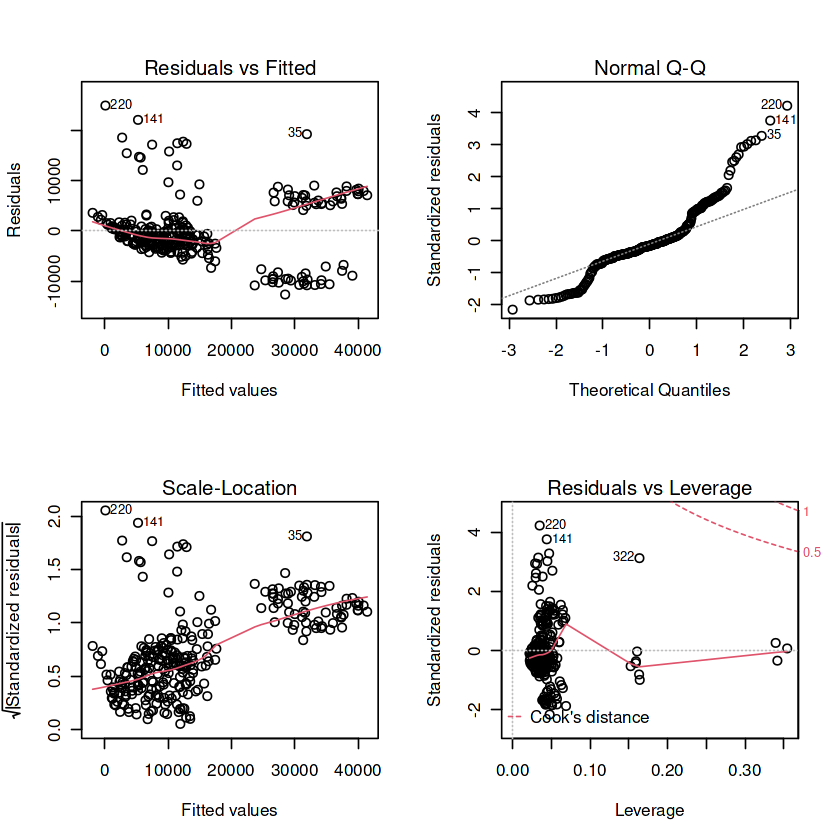

In [23]:
par(mfrow = (c(2, 2)))      # this gives us a 2x2 plot
plot(model)

Here, we can see that there are some outliers as well as the residuals are not normal. Let's do variable transformation here.

In [24]:
model1 <- lm(log(charges) ~ ., data = train)
summary(model1)


Call:
lm(formula = log(charges) ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86151 -0.20680 -0.04258  0.09968  2.11979 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.081832   0.168672  41.986  < 2e-16 ***
age          0.033279   0.001809  18.397  < 2e-16 ***
sex1        -0.049102   0.052388  -0.937 0.349441    
bmi          0.012188   0.004682   2.603 0.009740 ** 
children1    0.062789   0.067566   0.929 0.353547    
children2    0.238736   0.070896   3.367 0.000867 ***
children3    0.213267   0.086456   2.467 0.014241 *  
children4    0.506136   0.171623   2.949 0.003460 ** 
children5    0.388437   0.260260   1.492 0.136711    
smoker1      1.541990   0.062760  24.570  < 2e-16 ***
region1     -0.059916   0.073499  -0.815 0.415667    
region2     -0.153305   0.071436  -2.146 0.032741 *  
region3     -0.039030   0.075835  -0.515 0.607196    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resid

Here, the model has got improved as 77.48% of the variability in charges is explained by the model. Now again, let's do model diagnostics plot.

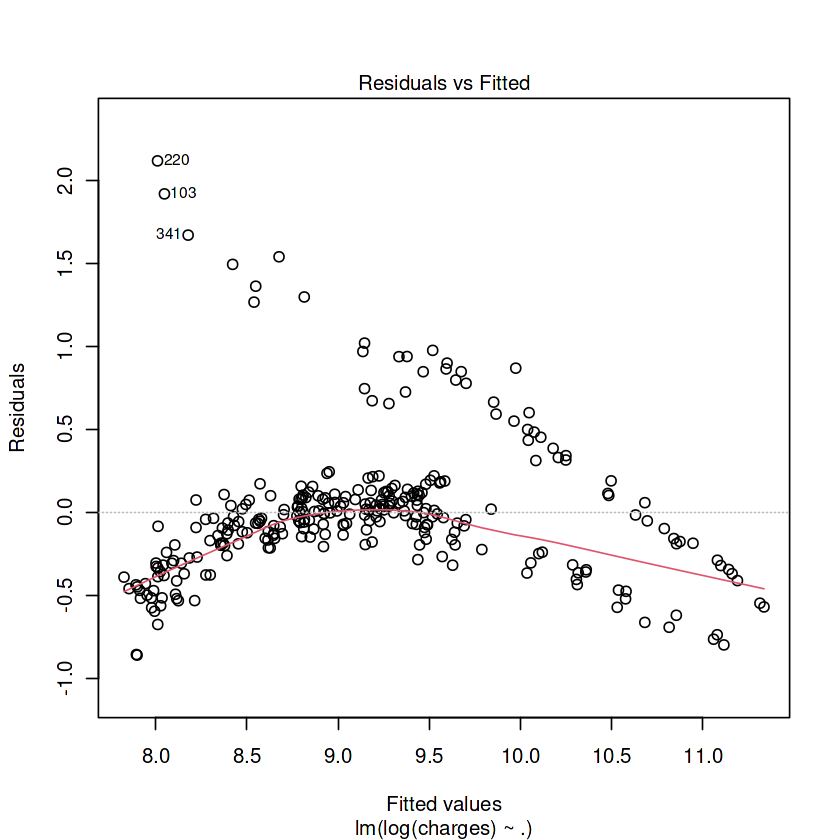

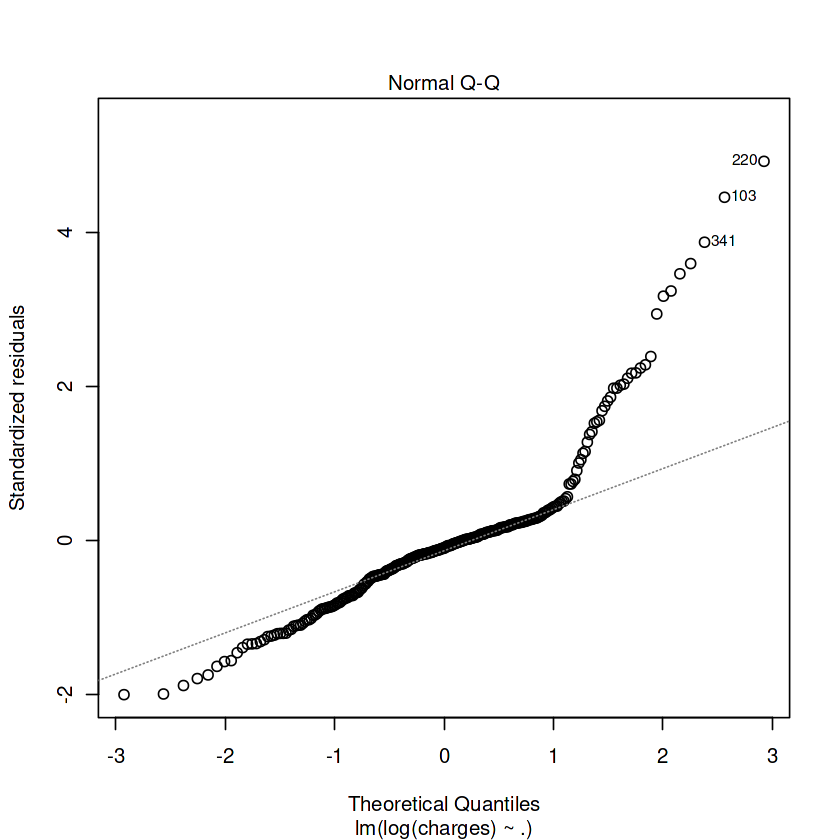

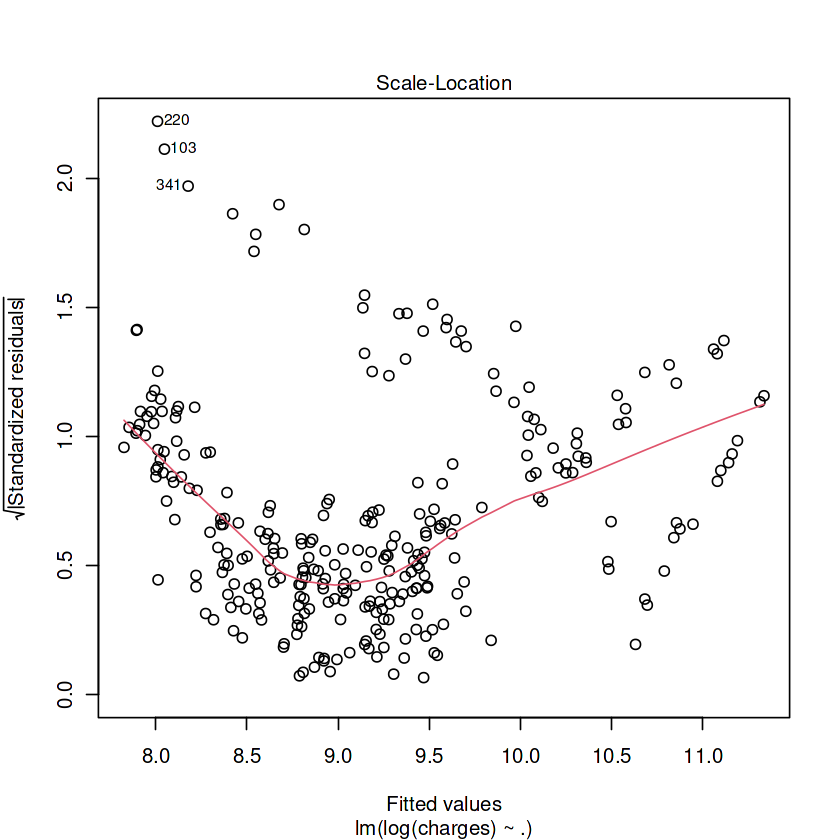

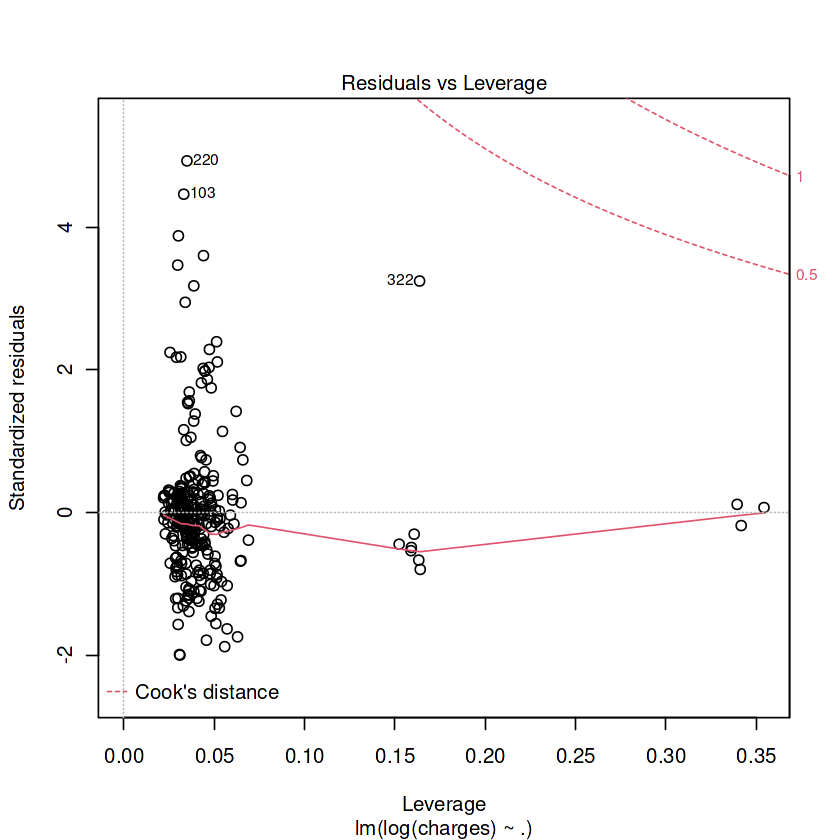

In [25]:
plot(model1)

Here, we need residual analysis to get the better model

Let's start pruning the model

**VIF test**

There's no multicollinearity in this dataset.

In [26]:
library(car)
vif(model1)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




,GVIF,Df,GVIF^(1/(2*Df))
age,1.040830,1,1.020211
sex,1.033426,1,1.016576
bmi,1.060820,1,1.029961
children,1.118524,5,1.011264
smoker,1.046420,1,1.022947
region,1.113143,3,1.018025


**Feature  Selection**

Feature selection can be done using:
* t-test
* stepwise regression (forward selection/backkward elimination)
* Lasso Regression

Here, I'm gonna use forward selection

**Forward Selection using AIC**

In [27]:
model_full <-lm(log(charges)~., data=train) # full model
model_empty <-lm(log(charges)~1, data=train) # empty model

In [28]:
library(MASS)
step <- stepAIC(model_empty, direction="forward", scope=list(upper = model_full, lower= model_empty))
summary(step)


Attaching package: ‘MASS’


The following object is masked from ‘package:olsrr’:

    cement


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=-42.58
log(charges) ~ 1

           Df Sum of Sq    RSS      AIC
+ smoker    1   117.878 129.81 -227.296
+ age       1    68.562 179.13 -134.234
+ bmi       1     4.296 243.40  -45.632
<none>                  247.69  -42.576
+ children  5     7.201 240.49  -41.103
+ sex       1     0.005 247.69  -40.583
+ region    3     2.608 245.08  -39.635

Step:  AIC=-227.3
log(charges) ~ smoker

           Df Sum of Sq     RSS     AIC
+ age       1    69.871  59.941 -448.61
+ bmi       1     4.097 125.715 -234.57
+ children  5     5.543 124.270 -229.91
+ sex       1     1.401 128.412 -228.43
<none>                  129.813 -227.30
+ region    3     1.322 128.491 -224.25

Step:  AIC=-448.61
log(charges) ~ smoker + age

           Df Sum of Sq    RSS     AIC
+ children  5    4.8103 55.131 -462.79
+ bmi       1    1.5879 58.354 -454.37
<none>                  59.941 -448.61
+ sex       1    0.2475 59.694 -447.81
+ region    3    0.7547 59.187 -446.28

Step:  AIC=-462.79
log(charges) ~ smo


Call:
lm(formula = log(charges) ~ smoker + age + children + bmi, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96322 -0.20429 -0.03564  0.10304  2.05162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.016530   0.157614  44.517  < 2e-16 ***
smoker1     1.535099   0.062076  24.729  < 2e-16 ***
age         0.033619   0.001806  18.618  < 2e-16 ***
children1   0.057443   0.067126   0.856 0.392871    
children2   0.239147   0.071102   3.363 0.000877 ***
children3   0.217125   0.086256   2.517 0.012388 *  
children4   0.499543   0.171451   2.914 0.003861 ** 
children5   0.441243   0.258904   1.704 0.089440 .  
bmi         0.010982   0.004611   2.381 0.017915 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4393 on 280 degrees of freedom
Multiple R-squared:  0.7818,	Adjusted R-squared:  0.7756 
F-statistic: 125.4 on 8 and 280 DF,  p-value: < 2.2e-16


In [29]:
model2 <- lm(log(charges) ~ smoker + age + children + bmi + sex, data = train)
summary(model2) # pruned model


Call:
lm(formula = log(charges) ~ smoker + age + children + bmi + sex, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93858 -0.21219 -0.03482  0.09966  2.02433 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.052117   0.161941  43.548  < 2e-16 ***
smoker1      1.541820   0.062478  24.678  < 2e-16 ***
age          0.033478   0.001812  18.476  < 2e-16 ***
children1    0.061726   0.067284   0.917 0.359726    
children2    0.238320   0.071118   3.351 0.000916 ***
children3    0.218520   0.086281   2.533 0.011869 *  
children4    0.505467   0.171587   2.946 0.003492 ** 
children5    0.432388   0.259105   1.669 0.096284 .  
bmi          0.010770   0.004617   2.333 0.020382 *  
sex1        -0.050400   0.052526  -0.960 0.338125    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4394 on 279 degrees of freedom
Multiple R-squared:  0.7826,	Adjusted R-squared:  0.7755 
F-statistic:

77.47% of the variability in charges is explained by my pruned model

**Detecting outliers**

In [30]:
outlierTest(model2)

    rstudent unadjusted p-value Bonferroni p
220 4.843948         2.1170e-06   0.00061181
103 4.750741         3.2527e-06   0.00094004
341 4.000722         8.1029e-05   0.02341700

**Detecting Influential Points**

In [31]:
influence.measures(model2)

Influence measures of
	 lm(formula = log(charges) ~ smoker + age + children + bmi + sex,      data = train) :

       dfb.1_  dfb.smk1   dfb.age  dfb.chl1  dfb.chl2  dfb.chl3  dfb.chl4
1    4.15e-02  5.77e-02 -4.31e-02 -2.76e-02 -2.78e-02 -1.80e-02 -3.78e-03
2    1.03e-02  6.10e-02  1.18e-01 -1.31e-01  4.32e-03 -6.47e-03  9.49e-03
3    1.49e-03  1.10e-02  1.60e-02  6.77e-04  3.04e-04 -4.19e-02  1.59e-03
5   -1.05e-02  1.01e-02  7.95e-03  1.60e-02  1.35e-02  1.11e-02  6.82e-03
6   -2.93e-02  6.73e-03  1.22e-02  1.53e-02  1.45e-02  1.13e-02  5.49e-03
7   -1.45e-04 -2.07e-04  1.23e-04  7.08e-04 -3.24e-06 -1.07e-07 -1.80e-05
8    1.08e-02 -5.44e-03 -5.53e-03  9.77e-04  6.16e-04  3.18e-02  3.49e-04
9   -6.34e-04  3.64e-03  2.21e-04  2.04e-04 -9.31e-03 -7.61e-05  3.16e-04
10   1.01e-01 -4.61e-02  1.76e-01 -1.02e-01 -9.23e-02 -9.44e-02 -3.89e-02
11  -3.50e-02  1.72e-02  2.66e-02  2.81e-02  2.26e-02  1.80e-02  1.08e-02
12  -5.50e-02 -2.06e-01 -1.52e-01  9.31e-02  8.62e-02  8.14e-02  1.22e-02
1

**MAPE** (Mean Absolute Percentage Error)

Only 3% of error from this model which is tolerable.

In [32]:
library("MLmetrics")
new_train = train
new_train$Fitted <- fitted(model2)
new_train$Actual <- log(new_train$charges)
MAPE(new_train$Fitted, new_train$Actual)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall




[1] 0.03016914

**Error Assumptions diagnostic test**
* Sum of the errors should be zero so that the mean of the errors will be zero.
* Errors are normal.
* Errors are homoscedastic.
* Errors are indepenent.

In [33]:
# Sum of the errors
sum(model2$residuals) 

[1] -6.986599e-16

In [34]:
# Mean of the errors is not zero but close to zero which is acceptable
mean = mean(model2$residuals)
mean

[1] -2.392091e-18

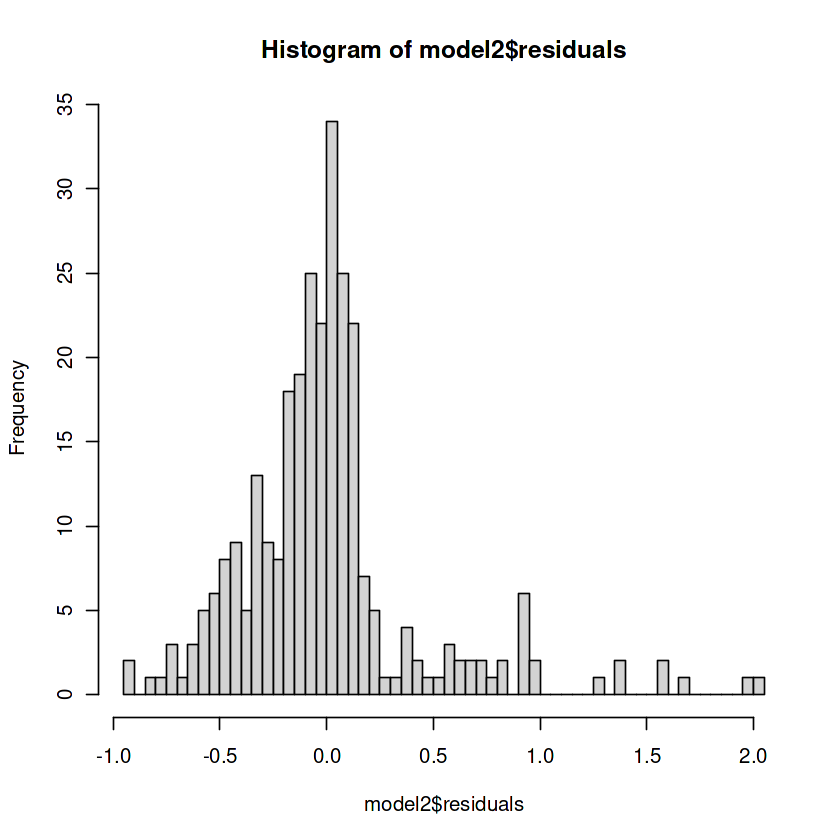

In [35]:
hist(model2$residuals, breaks=100) 

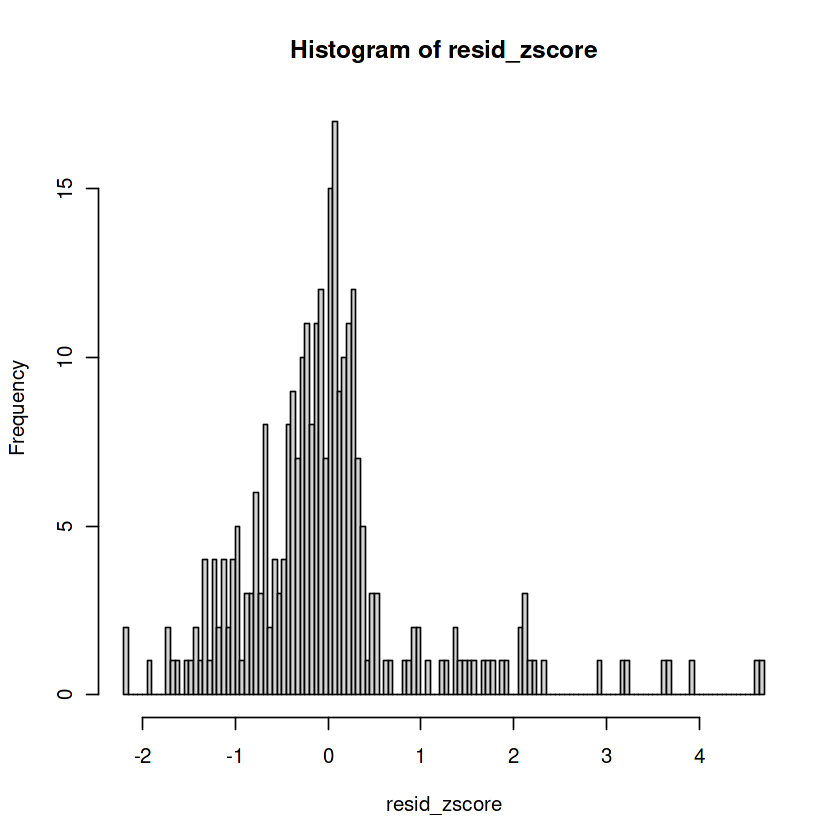

In [36]:
sd = sd(model2$residuals)
resid_zscore = (model2$residuals - mean)/sd   
hist(resid_zscore, breaks = 100)

**Shapiro-Wilk test**

In [37]:
#residuals are not normally distributed as there are more outliers
shapiro.test(model2$residuals)


	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.86108, p-value = 1.918e-15


**VIF test**

In [38]:
# There's no multicollinearity
vif(model2)

,GVIF,Df,GVIF^(1/(2*Df))
smoker,1.029813,1,1.014797
age,1.037033,1,1.018348
children,1.060636,5,1.005904
bmi,1.024444,1,1.012148
sex,1.031596,1,1.015675


**Breusch Pagan test**

In [39]:
# The residuals are homoscedastic
library(lmtest)
bptest(model2)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  model2
BP = 19.769, df = 9, p-value = 0.0194


**Durbin-Watson test**

In [40]:
# The residuals are independent
library(lmtest)
dwtest(model2)


	Durbin-Watson test

data:  model2
DW = 2.1536, p-value = 0.9031
alternative hypothesis: true autocorrelation is greater than 0


The model has satisfied all error assumptions.

**Plotting regression residuals**

This is to see whether the model fit the data

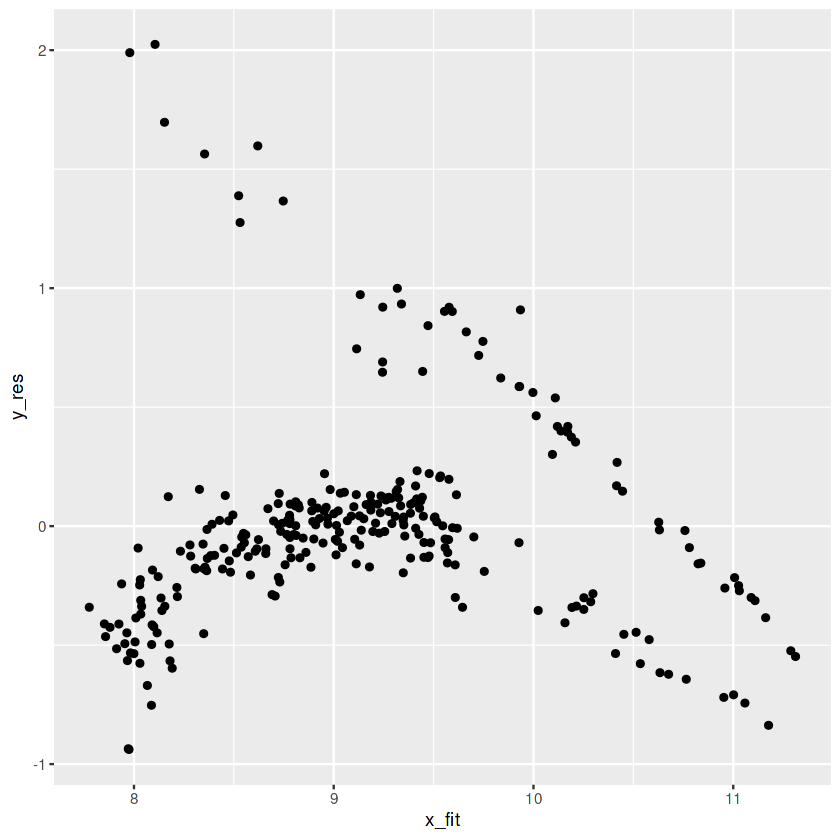

In [41]:
x_fit = fitted(model2)
y_res = resid(model2)

library(broom)
augmented_m <- augment(model2)

ggplot(augmented_m, aes(x = x_fit, y = y_res)) + 
  geom_point()

**Model diagnostics test for pruned model**

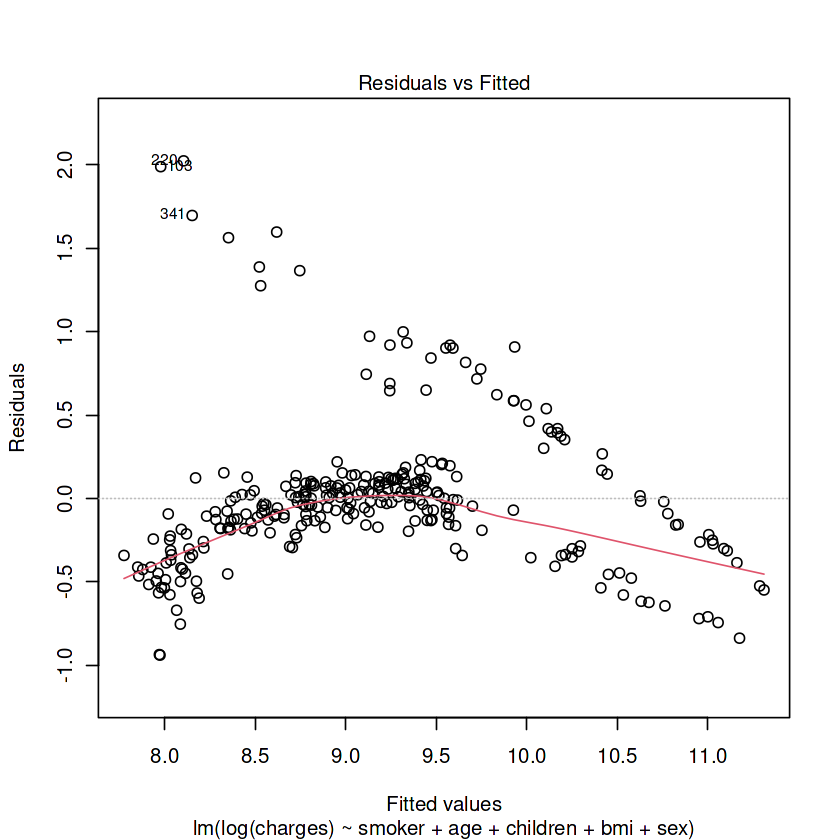

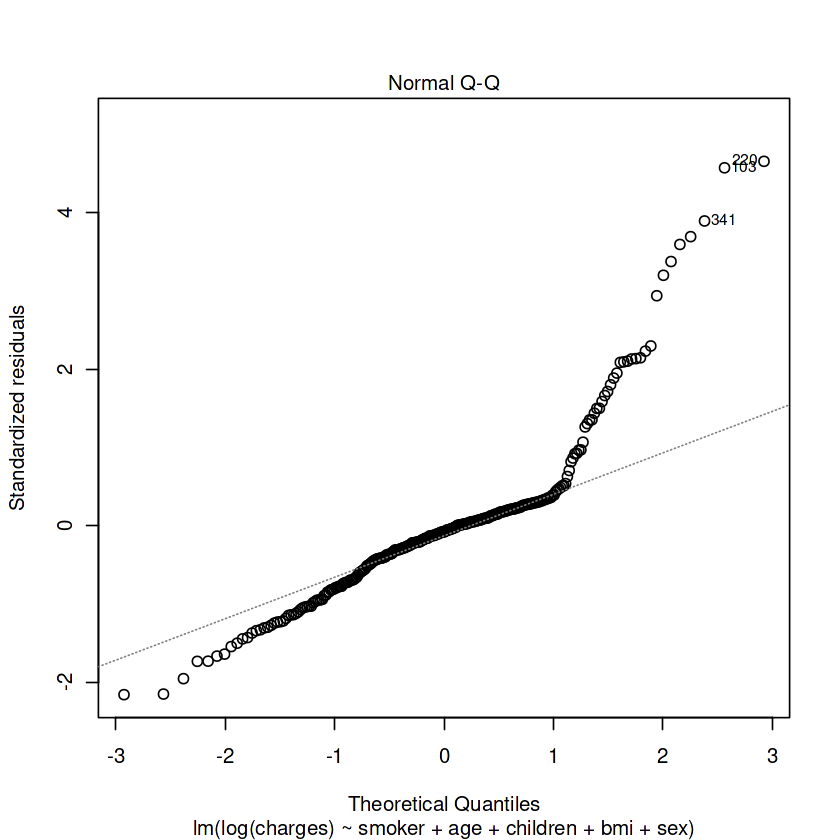

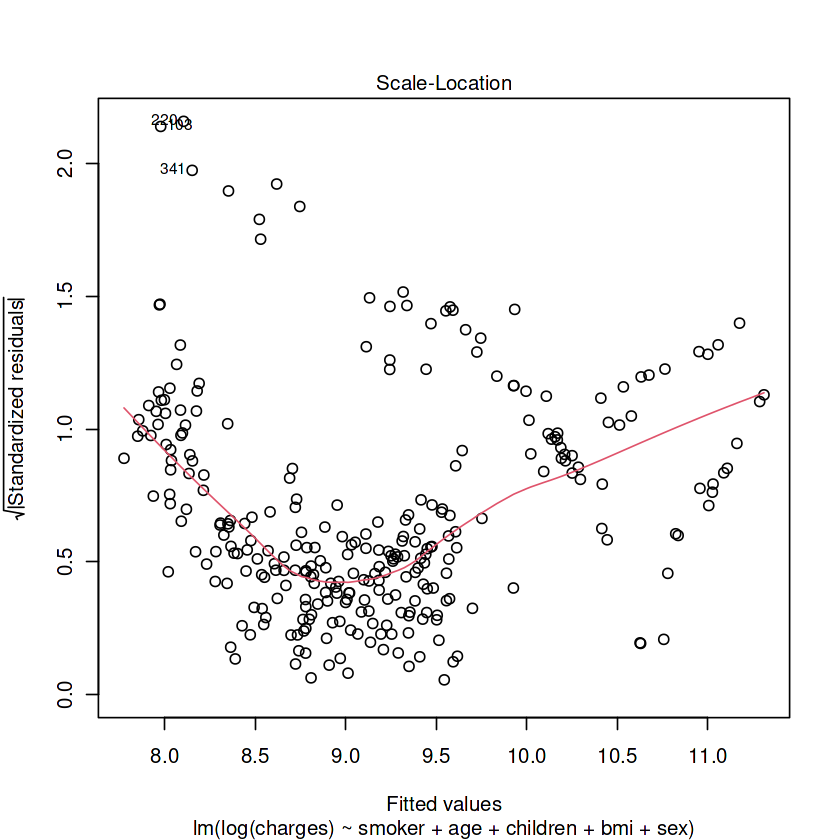

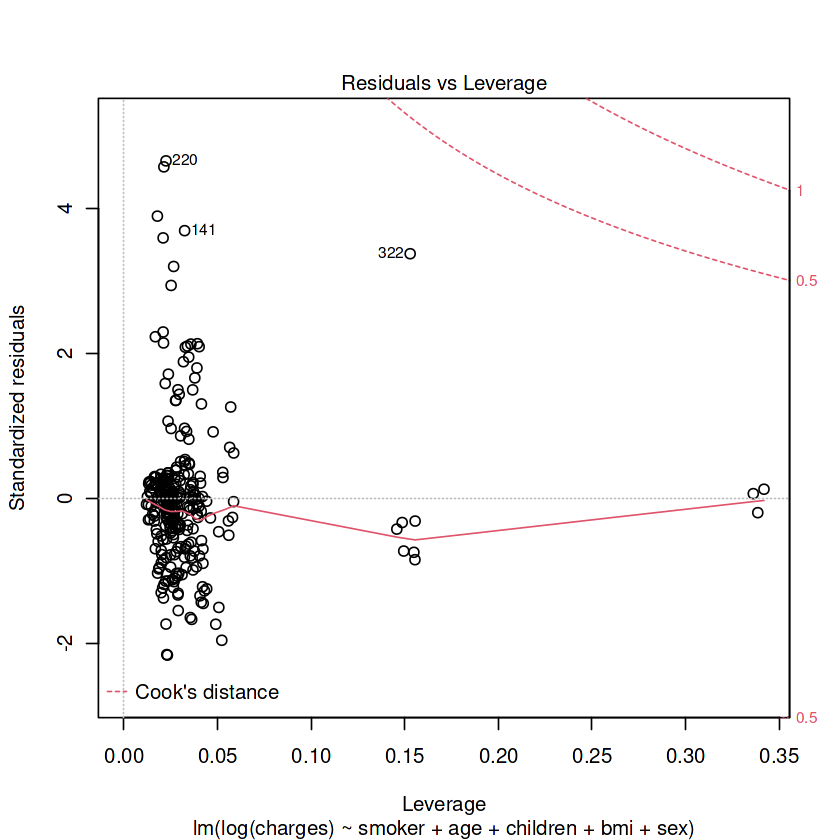

In [42]:
plot(model2)

**Regression diagnostics panel**

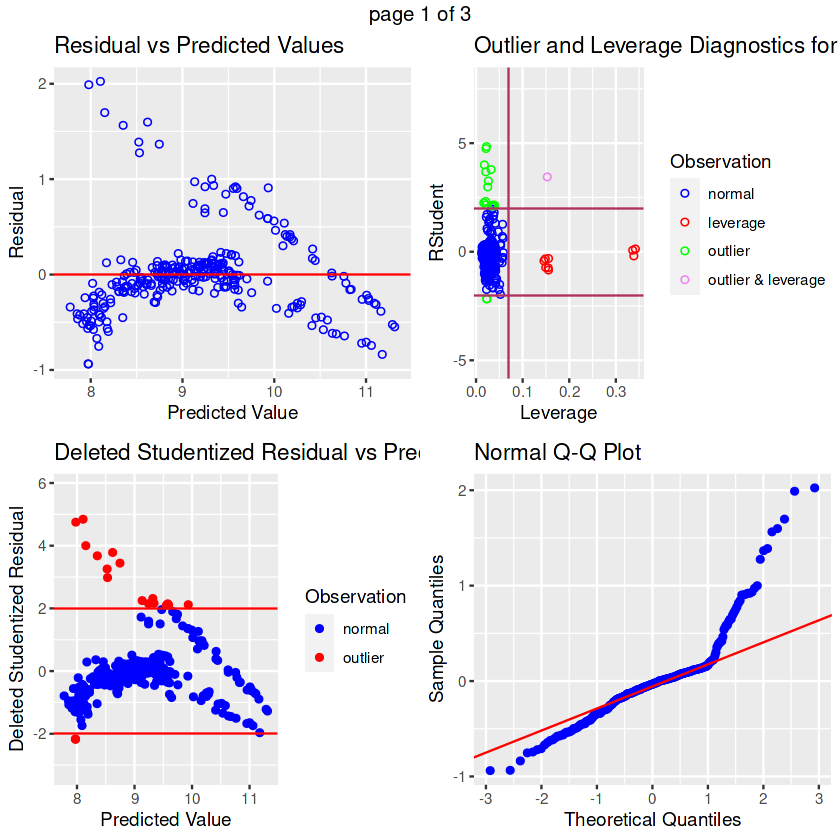

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


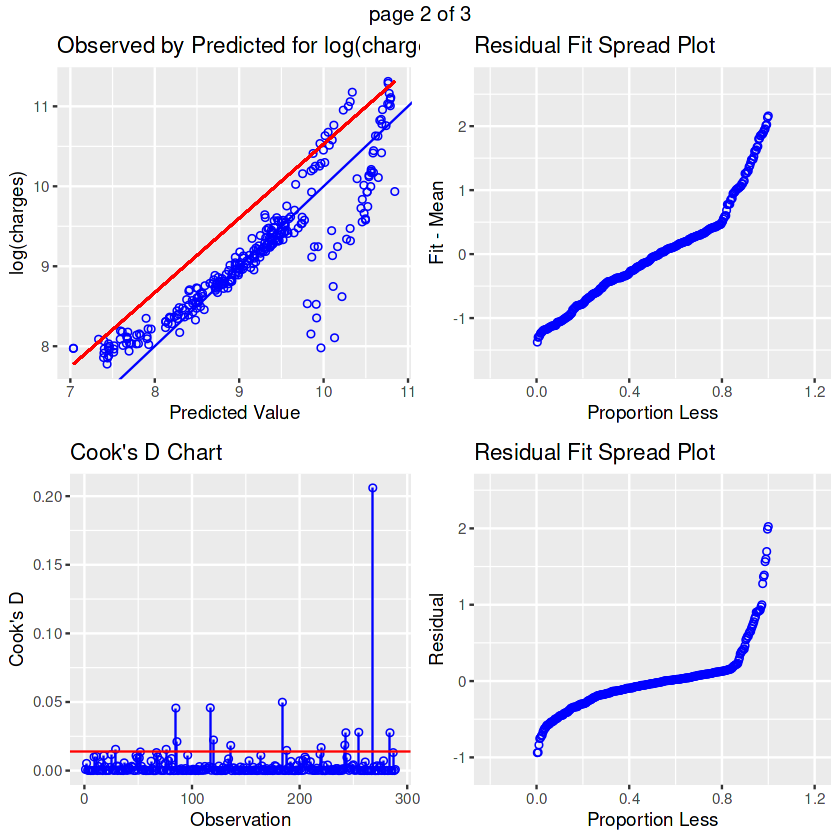

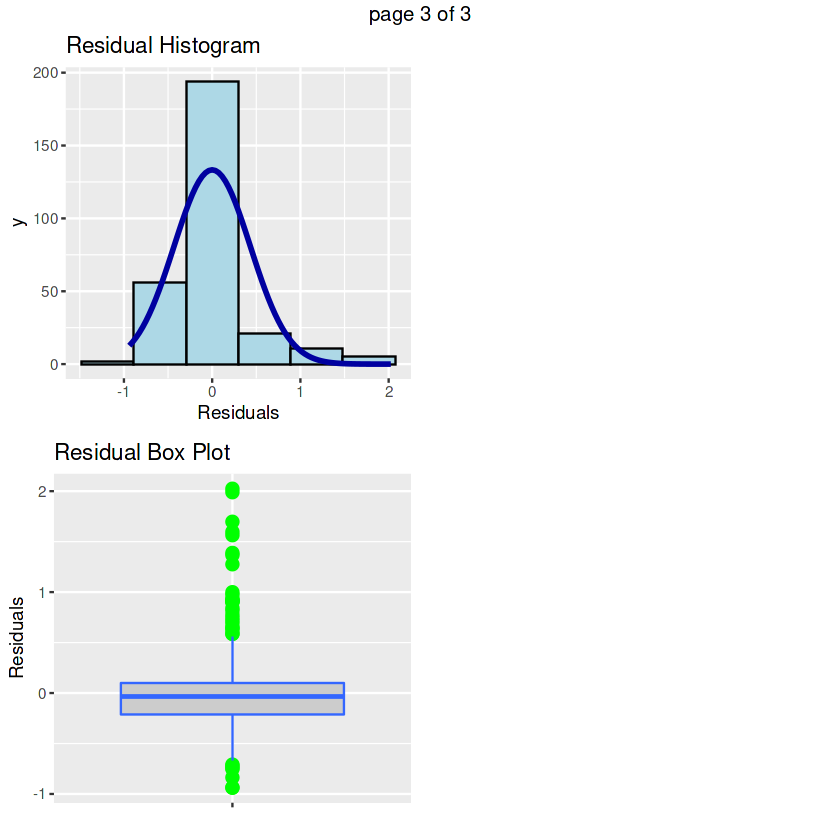

In [43]:
ols_plot_diagnostics(model2)

**Final model:**

**final_model<- lm(log(charges) ~ smoker + age + children + bmi + sex, data = train)**

**Prediction**

In [44]:
predict(model2, newdata = test, interval = "prediction")

,fit,lwr,upr
4,8.351025,7.477827,9.224224
13,8.142205,7.268769,9.015642
15,9.901191,9.018324,10.784059
19,9.310518,8.433649,10.187388
22,8.467135,7.592111,9.342160
26,9.544381,8.662318,10.426445
38,8.096163,7.220740,8.971586
40,10.981942,10.100294,11.863590
41,8.142075,7.269209,9.014941
56,11.121588,10.239440,12.003736


We have to take antilog of charge to get the charges insured to individuals